In [ ]:
from google.colab import files

# Upload the ZIP file from your local machine
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [ ]:
import zipfile
import os

# Updated zip file name
zip_file_name = "archive (1).zip"
extract_path = "/content/wildcat_dataset"

# Create directory and extract zip
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Extracted to: {extract_path}")


✅ Extracted to: /content/wildcat_dataset


In [ ]:
# Check folder names inside extracted path
folders = os.listdir(extract_path)
print("Found folders:")
for folder in folders:
    print("-", folder)



Found folders:
- wildcat_dataset


In [ ]:
data_dir = "/content/wildcat_dataset/wildcat_dataset"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

# Define training data generator with 20% validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())
print("✅ Class labels:", class_labels)


Found 187 images belonging to 8 classes.
Found 43 images belonging to 8 classes.
✅ Class labels: ['Cheetah in wild', 'Cougar in wild', 'Domestic Cat', 'Jaguar in wild', 'Leopard in wild', 'Lion in wild', 'Snow Leopard in wild', 'Tiger in wild']


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 without top layers
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_labels), activation='softmax')(x)

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,984 (9.24 MB)

 Trainable params: 165,000 (644.53 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.1263 - loss: 2.4442 - val_accuracy: 0.1860 - val_loss: 2.1354
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.1790 - loss: 2.2463 - val_accuracy: 0.3256 - val_loss: 1.9209
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.2862 - loss: 1.9925 - val_accuracy: 0.3721 - val_loss: 1.7445
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3037 - loss: 1.7344 - val_accuracy: 0.5349 - val_loss: 1.5945
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4264 - loss: 1.5895 - val_accuracy: 0.6977 - val_loss: 1.4675
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5715 - loss: 1.4181 - val_accuracy: 0.7442 - val_loss: 1.3524
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5695 - loss: 1.3368 - val_accuracy: 0.7442 - val_loss: 1.2483
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6104 - loss: 1.2799 - val_accuracy: 0.7442 - val_loss: 1.1504
Epoch 9/

In [ ]:
model.save("wildcat_classifier.keras")


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]

    print("✅ Predicted:", predicted_class)
    return predicted_class


Saving car.jpg to car.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


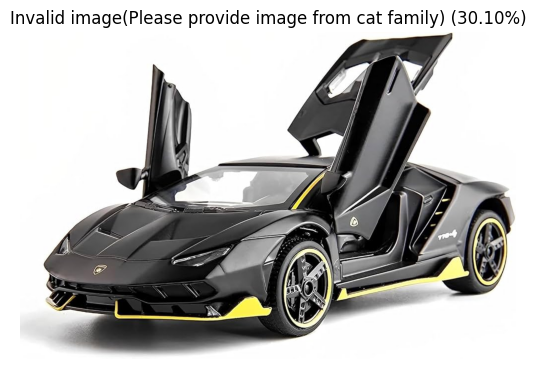

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image

# Step 1: Upload image
uploaded = files.upload()

# Step 2: Process and predict each image
for img_name in uploaded.keys():
    # Load and preprocess image
    img_path = img_name
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize like training

    # Predict
    prediction = model.predict(img_array)[0]  # Get the prediction vector

    # Get predicted index and confidence
    predicted_index = np.argmax(prediction)
    confidence = prediction[predicted_index]

    # Set threshold
    threshold = 0.35

    # Check if prediction is confident enough
    if confidence < threshold:
        predicted_class = "Invalid image(Please provide image from cat family)"
        title = f"{predicted_class} ({confidence*100:.2f}%)"
    else:
        predicted_class = class_labels[predicted_index]
        title = f"Predicted: {predicted_class} ({confidence*100:.2f}%)"

    # Display result

    plt.imshow(Image.open(img_path))
    plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:
# Save model in Keras format
model.save("wildcat_model.keras")

# Save class labels
import pickle
with open("class_labels.pkl", "wb") as f:
    pickle.dump(class_labels, f)


In [ ]:
from google.colab import files
files.download("wildcat_model.keras")
files.download("class_labels.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>